In [1]:
import os, sys
import numpy as np
import h5netcdf

import xarray as xr
import xarray.ufuncs as xu
import pandas as pd

from matplotlib import pyplot as plt

import cartopy.crs as ccrs
import cartopy

plt.rc("figure", figsize=(16,4))
plt.rc("font", size=14)
ccrs.PlateCarree()

from dask.distributed import Client, LocalCluster
cluster = LocalCluster(processes=False, n_workers=1, threads_per_worker=4)
client = Client(cluster)
client



/home/durandy/miniconda3/envs/towel/lib/python3.9/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 47899 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://137.129.155.67:47899/status,
Dashboard: http://137.129.155.67:47899/status,Workers: 1
Total threads: 4,Total memory: 78.61 GiB
Status: running,Using processes: False
Comm: inproc://137.129.155.67/22450/1,Workers: 1
Dashboard: http://137.129.155.67:47899/status,Total threads: 4
Started: Just now,Total memory: 78.61 GiB
Comm: inproc://137.129.155.67/22450/4,Total threads: 4
Dashboard: http://137.129.155.67:34805/status,Memory: 78.61 GiB
Nanny: None,


In [2]:
indir_data_FILTERED = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/FILTERED_ANOMALY/'
filenames = np.arange(2001,2019)
datasets = []
for f in filenames :
    _ds = xr.open_mfdataset(indir_data_FILTERED + 'TCWV/*' + str(f) + '*.nc', chunks = {'time' : 1}, parallel = True)
    _ds = _ds.sel(lat = slice(30,-30)).isel(lat = slice(0,None,4), lon = slice(0,None,4), time = slice(0,None,4))
    _ds = _ds.astype("float16")
    
    datasets.append(_ds)
    
ds = xr.concat(datasets, dim = 'time') 
# ds = xr.open_mfdataset(indir_data_FILTERED + 'TCWV/*.nc', chunks = {'time' : 100}, parallel = True)
# ds = ds.sel(lat = slice(30,-30))
ds

<xarray.Dataset>
Dimensions:      (time: 13148, lat: 61, lon: 360)
Coordinates:
  * time         (time) datetime64[ns] 2001-01-01 ... 2018-12-31T12:00:00
  * lat          (lat) float64 30.0 29.0 28.0 27.0 ... -27.0 -28.0 -29.0 -30.0
  * lon          (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Data variables:
    TCWV_Kelvin  (time, lat, lon) float16 dask.array<chunksize=(1, 61, 360), meta=np.ndarray>
    TCWV_Rossby  (time, lat, lon) float16 dask.array<chunksize=(1, 61, 360), meta=np.ndarray>
    TCWV_MJO     (time, lat, lon) float16 dask.array<chunksize=(1, 61, 360), meta=np.ndarray>
    TCWV_MRG     (time, lat, lon) float16 dask.array<chunksize=(1, 61, 360), meta=np.ndarray>
    TCWV_EIG     (time, lat, lon) float16 dask.array<chunksize=(1, 61, 360), meta=np.ndarray>
    TCWV_WIG     (time, lat, lon) float16 dask.array<chunksize=(1, 61, 360), meta=np.ndarray>
    TCWV_TD      (time, lat, lon) float16 dask.array<chunksize=(1, 61, 360), meta=np.ndarray>
    TCWV_LF      (time, lat, lon) float16 dask.array<chunksize=(1, 61, 360), meta=np.ndarray>

In [3]:
ds_Var = ds.var(dim = 'time')
ds_Var = ds_Var.load()

/home/durandy/miniconda3/envs/towel/lib/python3.9/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [4]:
map_proj = ccrs.Mercator(central_longitude=180.0, 
                         min_latitude=-20.1, 
                         max_latitude=20.1,
                         globe=None)

# plt.rc("figure", figsize=(20,14))
cmap ='BrBG'
vmin, vmax = -10, +10

colorbar = {'label': 'TCWV $kg^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both'}


# Variance de la colonne d'eau filtré pour la MJO

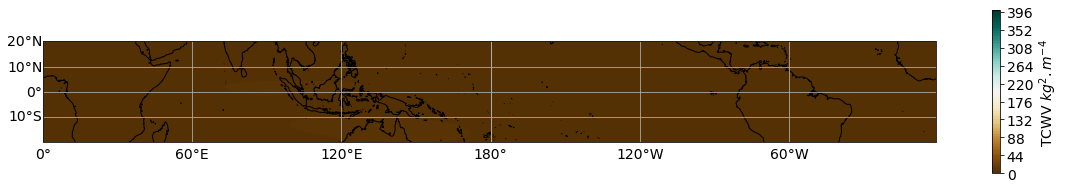

In [5]:
# plt.rc("figure", figsize=(20,14))
cmap ='BrBG'
vmin, vmax = 0, 400

#####################################################################################

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,3), subplot_kw={'projection': map_proj})

ds_Var['TCWV_MJO'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.show()

# Variance de la colonne d'eau filtré pour les TDs

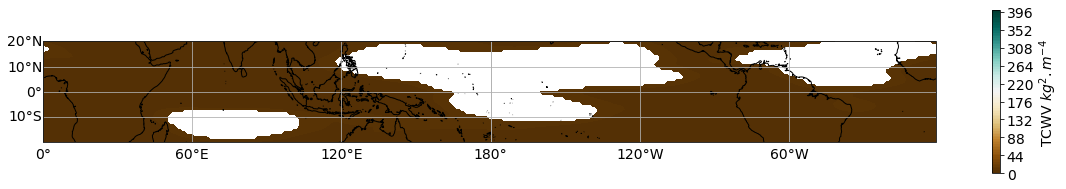

In [6]:
# plt.rc("figure", figsize=(20,14))
cmap ='BrBG'
vmin, vmax = 0, 400

#####################################################################################
fig, axis = plt.subplots( 1, 1, 
    figsize=(20,3), subplot_kw={'projection': map_proj})

ds_Var['TCWV_TD'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.show()

# Variance de la colonne d'eau filtré pour l'onde de Kelvin

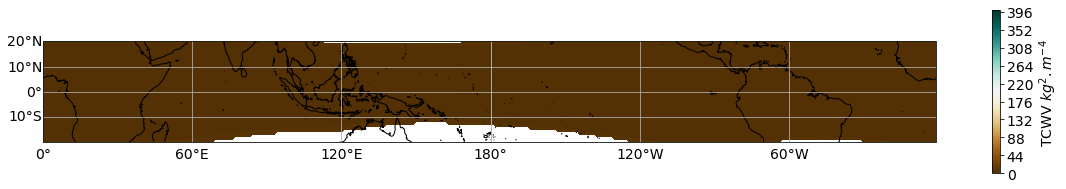

In [7]:
# plt.rc("figure", figsize=(20,14))
cmap ='BrBG'
vmin, vmax = 0, 400

#####################################################################################
fig, axis = plt.subplots( 1, 1, 
    figsize=(20,3), subplot_kw={'projection': map_proj})

ds_Var['TCWV_Kelvin'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.show()

# Variance de la colonne d'eau filtré pour l'onde de Rossby

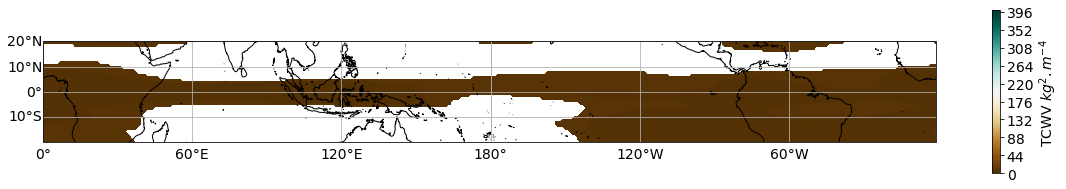

In [8]:
# plt.rc("figure", figsize=(20,14))
cmap ='BrBG'
vmin, vmax = 0, 400

#####################################################################################
fig, axis = plt.subplots( 1, 1, 
    figsize=(20,3), subplot_kw={'projection': map_proj})

ds_Var['TCWV_Rossby'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.show()

# Variance de la colonne d'eau filtré pour l'onde de Yanaï (MRG)

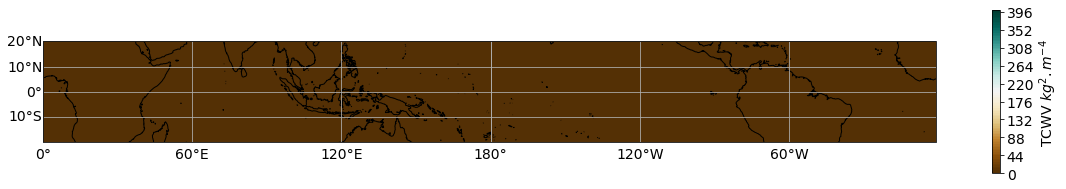

In [9]:
# plt.rc("figure", figsize=(20,14))
cmap ='BrBG'
vmin, vmax = 0, 400

#####################################################################################
fig, axis = plt.subplots( 1, 1, 
    figsize=(20,3), subplot_kw={'projection': map_proj})

ds_Var['TCWV_MRG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.show()

# Variance de la colonne d'eau filtré pour l'EIG

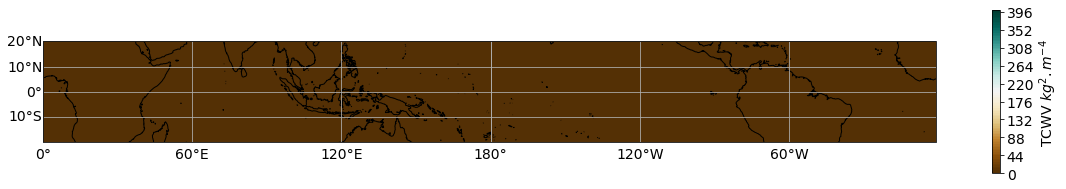

In [10]:
# plt.rc("figure", figsize=(20,14))
cmap ='BrBG'
vmin, vmax = 0, 400

#####################################################################################
fig, axis = plt.subplots( 1, 1, 
    figsize=(20,3), subplot_kw={'projection': map_proj})

ds_Var['TCWV_EIG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.show()

# Variance de la colonne d'eau filtré pour l'WIG

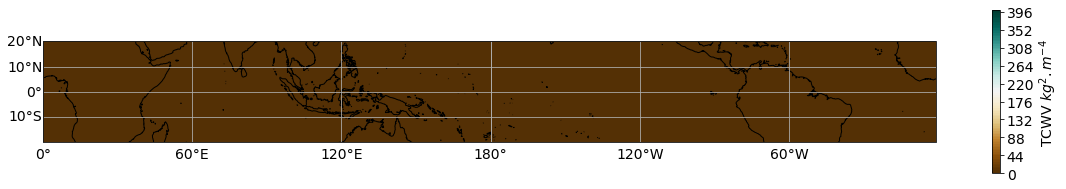

In [11]:
# plt.rc("figure", figsize=(20,14))
cmap ='BrBG'
vmin, vmax = 0, 400

#####################################################################################
fig, axis = plt.subplots( 1, 1, 
    figsize=(20,3), subplot_kw={'projection': map_proj})

ds_Var['TCWV_WIG'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.show()

# #####################################################

In [12]:
ds_V = ds_Var*0
i = 0
for f in filenames:
    _ds = xr.open_mfdataset(indir_data_FILTERED + 'OLR/*CERES*' + str(f) + '*.nc')
    _ds = _ds.var(dim = 'time')
    ds_V, i = ds_V + _ds, i + 1
ds_V = ds_V/i
ds_V

<xarray.Dataset>
Dimensions:  (lat: 0, lon: 0)
Coordinates:
  * lat      (lat) float64 
  * lon      (lon) float64 
Data variables:
    *empty*

KeyError: 'OLR_Kelvin'

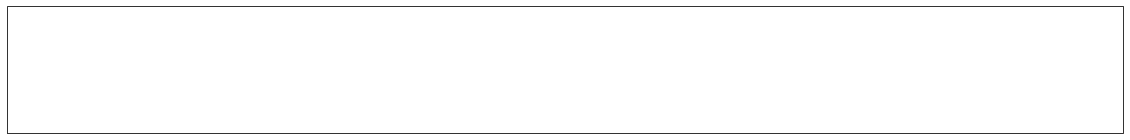

In [13]:
# plt.rc("figure", figsize=(20,14))
cmap ='BrBG'
vmin, vmax = 0, 400

#####################################################################################
colorbar = {'label': 'OLR $W.m^{-2}$',
            'orientation': 'vertical' ,
            'extend' : 'both'}

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,3), subplot_kw={'projection': map_proj})

ds_V['OLR_Kelvin'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.show()

In [ ]:
# ds_V = ds_Var*0
i = 0
datasets = []
for f in filenames:
    _ds = xr.open_mfdataset(indir_data_FILTERED + 'OLR/*CERES*' + str(f) + '*.nc')
    _ds = _ds.mean('time')
    _ds.coords['w'] = i
    _ds = _ds.expand_dims('w')
    i = i + 1
    datasets.append(_ds)
#     ds_V, i = ds_V + _ds, i + 1
# ds_V = ds_V/i
ds_V = xr.concat(datasets, dim = 'w')

# # plt.rc("figure", figsize=(20,14))
# cmap ='BrBG'
# vmin, vmax = 0, 400

# #####################################################################################
# colorbar = {'label': 'OLR $W.m^{-2}$',
#             'orientation': 'vertical' ,
#             'extend' : 'both'}

# fig, axis = plt.subplots( 1, 1, 
#     figsize=(20,3), subplot_kw={'projection': map_proj})

# ds_V['OLR_Kelvin'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = vmax,
#                     transform=ccrs.PlateCarree(),
#                     cmap=cmap ,
#                     cbar_kwargs=colorbar)

# axis.coastlines()
# gl = axis.gridlines(draw_labels=True)
# gl.top_labels = False
# gl.right_labels = False
# plt.show()

In [ ]:
# _ds = _ds.expand_dims('w')
ds_V = ds_V.var(dim = 'w')*2e3
ds_plot = ds_V['OLR_Kelvin'].load()
ds_plot.max()

In [ ]:
#####################################################################################
colorbar = {'label': 'OLR $W.m^{-2}$',
            'orientation': 'vertical' ,
            'extend' : 'both'}

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,3), subplot_kw={'projection': map_proj})

ds_plot.plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = 40,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.show()

In [ ]:
_ds = ds.groupby("time.day").mean("time")
_ds = _ds.var(dim = 'day')
ds_plot = _ds['OLR_Kelvin'].load()
ds_plot.max()


In [ ]:
#####################################################################################
colorbar = {'label': 'OLR $W.m^{-2}$',
            'orientation': 'vertical' ,
            'extend' : 'both'}

fig, axis = plt.subplots( 1, 1, 
    figsize=(20,3), subplot_kw={'projection': map_proj})

_ds['OLR_Kelvin'].plot.contourf(ax=axis, levels = 101, vmin = vmin, vmax = 40,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap ,
                    cbar_kwargs=colorbar)

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.show()

In [ ]:
_ds = ds.groupby("time.year").std("time")
_ds = _ds.mean(dim = 'year')
ds_plot = _ds['OLR_Kelvin'].load()
ds_plot.max()

In [ ]:
ds